In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor

In [4]:
opros = pd.read_csv("final_opros.csv") 
opros = opros.drop(columns = "Unnamed: 0")
opros.head()


,Female,Male,Возраст,Single,In_relations,Married,[Смартфоны и умные часы],[Портативная техника],[Аудио- и видеотехника],[Всё для геймеров],...,рисование,кино,компьютерные игры,прогулки,рукоделие,садоводство,соцсети,спорт,чтение нон-фикшн/профессиональной литературы,чтение художественной литературы
0,1,0,19,1,0,0,6,8,8,10,...,0,0,1,0,1,0,1,0,1,1
1,1,0,15,1,0,0,10,10,10,8,...,1,0,1,1,0,0,1,0,1,1
2,1,0,14,1,0,0,10,8,8,10,...,1,0,1,0,0,0,1,0,0,0
3,1,0,16,1,0,0,8,6,6,0,...,1,0,0,0,0,0,1,0,0,1
4,1,0,17,1,0,0,0,6,10,10,...,1,0,1,0,0,0,1,0,0,0


Выберем наконец X и Y

In [14]:
cols = list(opros.columns)
X = opros[cols[:5] + cols[-12:]]
X.head()

,Female,Male,Возраст,Single,In_relations,автомобили,бьюти-практики,рисование,кино,компьютерные игры,прогулки,рукоделие,садоводство,соцсети,спорт,чтение нон-фикшн/профессиональной литературы,чтение художественной литературы
0,1,0,19,1,0,0,0,0,0,1,0,1,0,1,0,1,1
1,1,0,15,1,0,0,0,1,0,1,1,0,0,1,0,1,1
2,1,0,14,1,0,0,0,1,0,1,0,0,0,1,0,0,0
3,1,0,16,1,0,0,0,1,0,0,0,0,0,1,0,0,1
4,1,0,17,1,0,0,0,1,0,1,0,0,0,1,0,0,0


In [13]:
Y = opros[cols[6:-12]]
Y.head()

,[Смартфоны и умные часы],[Портативная техника],[Аудио- и видеотехника],[Всё для геймеров],[Фото- и видеокамеры],[Робототехника и Stem-игрушки],[Игры и приставки],[GPS-навигация],[Техника для дома],[Техника для красоты],...,[Здоровое питание],[Все для выпечки],[Алкоголь],[Сумки и чемоданы],[Музыкальные инструменты],[Книги],[Игры для компаний],[Билеты],[Гадания и предсказания],[Квадрокоптеры]
0,6,8,8,10,10,6,10,0,6,6,...,0,8,10,6,10,10,10,10,10,0
1,10,10,10,8,10,6,10,0,6,6,...,0,10,0,6,0,10,10,10,0,10
2,10,8,8,10,8,10,10,6,8,0,...,6,6,0,6,6,6,8,8,6,6
3,8,6,6,0,6,0,0,0,0,0,...,8,6,6,0,0,10,6,6,0,0
4,0,6,10,10,6,0,8,0,6,0,...,8,6,6,0,0,0,0,6,0,0


Сначала покажу всё что я делала с классификацией

In [16]:
classifier = MultiOutputClassifier(DecisionTreeClassifier(max_depth=3, criterion='gini'))
classifier

MultiOutputClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                

Сейчас будет много самописный метрик качества, потому что мультилэйбл мультикласс мультиаутпут и всё одновременно sklearn не даёт

In [17]:
def my_accuracy(Y_pred, Y):
    a = 0
    b = 0
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if Y[i][j] == Y_pred[i][j]:
                a+=1
            else:
                b+=1
    return a/(a+b)

In [18]:
def accuracy_by_label(Y_pred, Y):
    res = []
    for i in range(Y.shape[1]):
        a = 0 # простые счётчики
        b = 0
        for j in range(Y.shape[0]):
            if Y_pred[j][i] == Y[j][i]:
                a+=1
            else:
                b+=1
        res.append(a/(a+b))
    return res

In [19]:
def accuracy_by_row(Y_pred, Y):
    res = []
    for i in range(Y.shape[0]):
        a = 0
        b = 0
        for j in range(Y.shape[1]):
            if Y_pred[i][j] == Y[i][j]:
                a+=1
            else:
                b+=1
        res.append(a/(a+b))
    return res

Итак, нам нужна какая-нибудь метрика типа precision и recall, но только не для бинарной классификации, а для multioutput-multiclass классификации

у нас есть confusion_matrix для мультиклассовой классификации, мы применим её для каждого label (то есть для каждой категории товара)

micro-averaging и macro-averaging это такие алгоритмы усреднения метрик по классам.

 A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric.

Class A: 1 TP and 1 FP
Class B: 10 TP and 90 FP
Class C: 1 TP and 1 FP
Class D: 1 TP and 1 FP
You can see easily that PrA=PrC=PrD=0.5, whereas PrB=0.1.

A macro-average will then compute: Pr=(0.5+0.1+0.5+0.5)/4=0.4
A micro-average will compute: Pr=(1+10+1+1)/(2+100+2+2)=0.123

источник https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

$\text{Precision}_{~i} = \cfrac{M_{ii}}{\sum_j M_{ji}}$

$\text{Recall}_{~i} = \cfrac{M_{ii}}{\sum_j M_{ij}}$

In [20]:
from sklearn.metrics import confusion_matrix

def conf_matrices(Y_pred, Y_train):
    conf_matrices = []
    for i in range(Y_train.shape[1]):
        y = Y_train[:,i]
        y_pred = Y_pred[:,i]
        conf_matrices.append(confusion_matrix(y_pred, y, labels = [10, 8, 6, 0]))
    return conf_matrices

In [21]:
def get_prec_rec_from_conf_matrix(conf_matrix):
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1)
    recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 0)
    return precision, recall

In [22]:
#эта функция кинет ворнинг изза деления, это не важно,работает всё корректно
def print_macro_averaged(conf_matrices, word):
    prec = []
    rec = []
    for i in conf_matrices:
        a, b = get_prec_rec_from_conf_matrix(i)
        prec.append(np.nan_to_num(a)) # здесь будет целая куча nan изза пустых строк нулевых, оттуда ворнинг
        rec.append(np.nan_to_num(b))
    print("macro averaged precision ", word, np.mean(prec))
    print("macro averaged recall ", word, np.mean(rec), '\n')

Я собрала все эти метрики в единый тестирующий паровозик

In [23]:
def big_test_for_model(classifier, dfX, dfY, random_seed):
    
    X = np.array(dfX)
    Y = np.array(dfY)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = random_seed)
    print("Размеры X_train, X_test, Y_train, Y_test:", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, '\n')
    classifier.fit(X_train, Y_train)
    
    Y_train_pred = classifier.predict(X_train)
    Y_test_pred = classifier.predict(X_test)
    Y_pred = classifier.predict(X)
    
    print("Accuracy на обучающей выборке: ", my_accuracy(Y_train_pred, Y_train))
    print("Accuracy на тестовой выборке: ", my_accuracy(Y_test_pred, Y_test), '\n')
    
    print()
    print("accuracy_by_row train, насколько всё хорошо у людей из обучающей выборки")
    accuracy_by_row_train = accuracy_by_row(classifier.predict(X_train), Y_train)
    plt.hist(accuracy_by_row_train)
    plt.show()
    
    print("accuracy_by_row test, у людей из тестовой")
    accuracy_by_row_test = accuracy_by_row(classifier.predict(X_test), Y_test)
    plt.hist(accuracy_by_row_test)
    plt.show()
    
    print("accuracy_by_label train, насколько всё хорошо у классов в обучающей")
    plt.hist(accuracy_by_label(classifier.predict(X_train), Y_train))
    plt.show()
    
    print("accuracy_by_label test, у классов в тестовой")
    accuracy_by_label_test = accuracy_by_label(classifier.predict(X_test), Y_test)
    plt.hist(accuracy_by_label_test)
    plt.show()
    '''
    print("Посмотрим на людей с большой ошибкой")
    for i in range(len(accuracy_by_row_train)):
        if accuracy_by_row_train[i] < 0.35:
            print("метрика: ", accuracy_by_row_train[i])
            print("данные человека: ", X_train[i])
            print("дано: ", Y_train[i])
            print("предсказано: ", classifier.predict(X_train)[i])
            print()
            
    for i in range(len(accuracy_by_row_test)):
        if accuracy_by_row_test[i] < 0.35:
            print("метрика: ", accuracy_by_row_test[i])
            print("данные человека: ", X_test[i])
            print("дано: ", Y_test[i])
            print("предсказано: ", classifier.predict(X_test)[i])
    
    print("Вот эти столбцы плохо предсказываются: ")
    for i in range(len(accuracy_by_label_test)):
        if accuracy_by_label_test[i] < 0.3:
            print(dfY.columns[i])
    '''
    print("Получим confusion_matrix для каждого лейбла (категории товара)")
    conf_matrices_train = conf_matrices(Y_train_pred, Y_train)
    conf_matrices_test = conf_matrices(Y_test_pred, Y_test)
    conf_matrices_all = conf_matrices(Y_pred, Y)
    print("Пример: ", conf_matrices_all[:3])
    
    print("Посчитаем средние точность и полноту двумя алгоритмами")
    
    sum_matrices = [sum(conf_matrices_train), sum(conf_matrices_test), sum(conf_matrices_all)]
    print('Суммарная confusion_matrix для train: ', sum_matrices[0], "\n для test: ", sum_matrices[1], '\n вообще: ', sum_matrices[2])
    
    print("Micro-average: ")
    prec, rec = get_prec_rec_from_conf_matrix(sum_matrices[0])
    print("micro-averaged precision train", np.mean(prec))
    print("micro-averaged recall train", np.mean(rec))
    print()
    prec, rec = get_prec_rec_from_conf_matrix(sum_matrices[1])
    print("micro-averaged precision test", np.mean(prec))
    print("micro-averaged recall test", np.mean(rec))
    print()
    prec, rec = get_prec_rec_from_conf_matrix(sum_matrices[2])
    print("micro-averaged precision all", np.mean(prec))
    print("micro-averaged recall all", np.mean(rec))
    print()
    
    print("Macro-average: ")
    #щас будут ворнинги это не важно
    print_macro_averaged(conf_matrices_train, "train")
    print_macro_averaged(conf_matrices_test, "test")
    print_macro_averaged(conf_matrices_all, "all")
    
    print("MSE: ")
    sum_mse = 0
    print("train ", mean_squared_error(Y_train, Y_train_pred))
    print('test ', mean_squared_error(Y_test, Y_test_pred))
    print('all ', mean_squared_error(Y, Y_pred))
    
    print("\nMAE: ")
    print("train ", mean_absolute_error(Y_train, Y_train_pred))
    print('test ', mean_absolute_error(Y_test, Y_test_pred))
    print('all ', mean_absolute_error(Y, Y_pred))

Размеры X_train, X_test, Y_train, Y_test: (81, 17) (36, 17) (81, 47) (36, 47) 

Accuracy на обучающей выборке:  0.6049382716049383
Accuracy на тестовой выборке:  0.41371158392434987 


accuracy_by_row train, насколько всё хорошо у людей из обучающей выборки


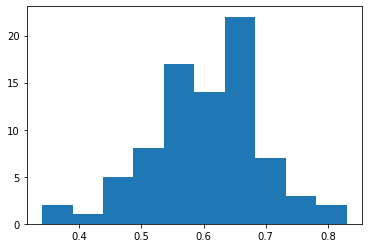

accuracy_by_row test, у людей из тестовой


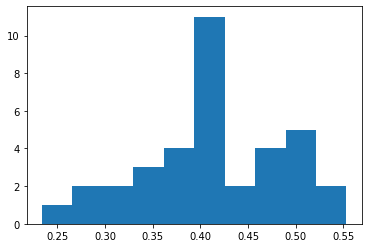

accuracy_by_label train, насколько всё хорошо у классов в обучающей


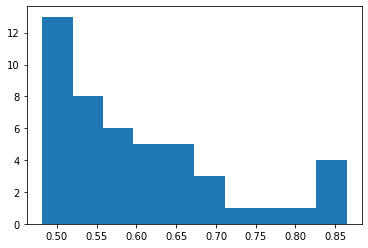

accuracy_by_label test, у классов в тестовой


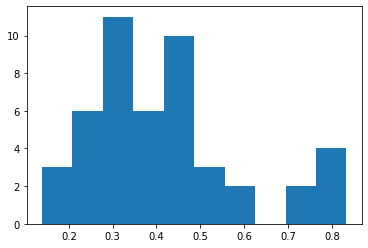

Получим confusion_matrix для каждого лейбла (категории товара)
Пример:  [array([[59, 20,  5,  3],
       [ 9, 14,  4,  2],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  1]], dtype=int64), array([[40, 31, 18,  6],
       [ 2, 16,  1,  0],
       [ 0,  1,  2,  0],
       [ 0,  0,  0,  0]], dtype=int64), array([[33, 15,  4,  3],
       [12, 35,  8,  5],
       [ 0,  0,  2,  0],
       [ 0,  0,  0,  0]], dtype=int64)]
Посчитаем средние точность и полноту двумя алгоритмами
Суммарная confusion_matrix для train:  [[586 175 103  80]
 [120 375  98  74]
 [136 136 433 140]
 [ 90 119 233 909]] 
 для test:  [[157 126  84  48]
 [ 83  93  90  58]
 [ 43  82 104 135]
 [ 35  74 134 346]] 
 вообще:  [[ 743  301  187  128]
 [ 203  468  188  132]
 [ 179  218  537  275]
 [ 125  193  367 1255]]
Micro-average: 
micro-averaged precision train 0.5920606437514324
micro-averaged recall train 0.5874070363558682

micro-averaged precision test 0.3846252271326933
micro-averaged recall test 0.39589392392767564

micro-

C:\Users\lkuro\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\lkuro\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
big_test_for_model(classifier, X, Y, 21)

(не обращаем внимания на ворнинг, всё работает корректно)
как я и говорила в отчёте, видно, что на мерках классификации модель показывает себя весьма и весьма посредственно, но по MAE и MSE видно что работает она на самом деле нормально, попадает в соседнюю от верной категорию, что в нашем случае, когда категории имеют вид "круто" "хорошо" "нормально" "нет" не так уж плохо

In [25]:
#теперь быстренько регрессия
regr = MultiOutputRegressor(DecisionTreeRegressor(max_depth=3))
regr

MultiOutputRegressor(estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                                     splitter='best'),
                     n_jobs=None)

In [26]:
#print("MAE: ")
X = np.array(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 122)
print("Размеры X_train, X_test, Y_train, Y_test:", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, '\n')
regr.fit(X_train, Y_train)

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)
Y_pred = regr.predict(X)
print("MSE: ")
print("train ", mean_squared_error(Y_train, Y_train_pred))
print('test ', mean_squared_error(Y_test, Y_test_pred))
print('all ', mean_squared_error(Y, Y_pred))
print("\nMAE: ")
print("train ", mean_absolute_error(Y_train, Y_train_pred))
print('test ', mean_absolute_error(Y_test, Y_test_pred))
print('all ', mean_absolute_error(Y, Y_pred))

Размеры X_train, X_test, Y_train, Y_test: (81, 17) (36, 17) (81, 47) (36, 47) 

MSE: 
train  7.412184609683148
test  13.377735434105688
all  9.247738709505466

MAE: 
train  2.056881886131577
test  2.8330221626391197
all  2.2956942789031287


значения МАЕ для людей из обучающей выборки


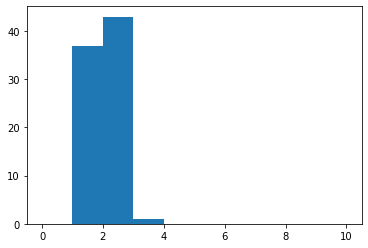

для людей из тестовой выборки


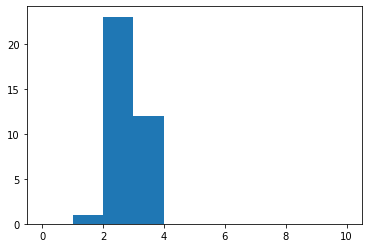

значения МАЕ для классов из обучающей выборки


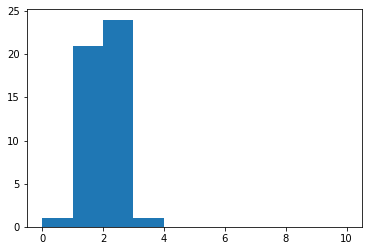

классов из тестовой выборки


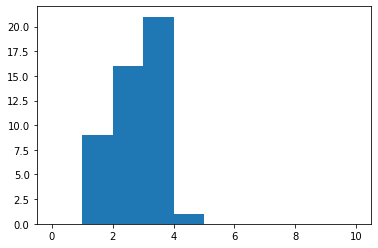

In [27]:
#посмотрим MAE по классам
print("значения МАЕ для людей из обучающей выборки")
mae_by_row_train = []

for i in range(Y_train.shape[0]):
    mae_by_row_train.append(mean_absolute_error(Y_train[i], Y_train_pred[i]))

plt.hist(mae_by_row_train, range = [0, 10])
plt.show()

print("для людей из тестовой выборки")
mae_by_row_test = []

for i in range(Y_test.shape[0]):
    mae_by_row_test.append(mean_absolute_error(Y_test[i], Y_test_pred[i]))

plt.hist(mae_by_row_test, range = [0, 10])
plt.show()

print("значения МАЕ для классов из обучающей выборки")
mae_by_column_train = []

for i in range(Y_train.shape[1]):
    mae_by_column_train.append(mean_absolute_error(Y_train[:,i], Y_train_pred[:, i]))

plt.hist(mae_by_column_train, range = [0, 10])
plt.show()

print("классов из тестовой выборки")
mae_by_column_test = []

for i in range(Y_test.shape[1]):
    mae_by_column_test.append(mean_absolute_error(Y_test[:,i], Y_test_pred[:, i]))

plt.hist(mae_by_column_test, range = [0, 10])
plt.show()



вывод - модель работает прямо таки удивительно хорошо, всё время попадает примерно куда надо (как и должны деревья, они ведь с низким смещением), не переобучена

In [34]:
import pickle

In [35]:
filename = 'finalized_model.sav'
pickle.dump(regr, open(filename, 'wb'))